In [19]:
import torch as t
from random import randint
import matplotlib.pyplot as plt

In [6]:
k_values = [randint(1, 38 -1) for _ in range(4)]

In [7]:
k_values

[33, 17, 33, 18]

In [44]:
M_k = t.cat(
    [
        t.stack(
            [
                t.cat((t.cos(2 * t.pi * k * t.arange(38 - 1) / (38 - 1)), t.tensor([0]))),
                t.cat((t.sin(2 * t.pi * k * t.arange(38 - 1) / (38 - 1)), t.tensor([0]))),
            ] 
        )
        for k in k_values
    ] 
)

In [45]:
M_k = M_k.T

In [46]:
M_k.shape


torch.Size([38, 8])

In [49]:
vocab_size = 38
n_blocks = 4

In [50]:
k_values = [randint(1, vocab_size -1) for _ in range(n_blocks)]
print(k_values)
arange_tensor = t.arange(vocab_size - 1).float()
div_tensor = 2 * t.pi * arange_tensor / (vocab_size - 1)

# Create M_k without transposing
M_k_list = [
    t.stack([
        t.cat((t.cos(k * div_tensor), t.tensor([0]))),
        t.cat((t.sin(k * div_tensor), t.tensor([0])))
    ], dim=1)
    for k in k_values
]
M_k = t.cat(M_k_list, dim=1)

[1, 13, 29, 24]


In [51]:
def plot_embeddings_chunks(embeddings):
    chunked = t.chunk(embeddings, embeddings.shape[-1]//2, dim = -1)
    n = embeddings.shape[-1]//2

    # calculate number of rows and columns for subplots
    rows = int(n ** 0.5)
    cols = n // rows
    if rows * cols < n:  # if not enough subplots, add an extra column
        cols += 1

    # visualise each vocab_size x 2 chunk in a subplot
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
    axs = axs.flatten()  # flatten the array of axes to simplify indexing
    for i, chunk in enumerate(chunked):
        axs[i].scatter(chunk[:, 0], chunk[:, 1])
        words = [str(i) for i in range(embeddings.shape[0])]
        for j, word in enumerate(words):
            axs[i].annotate(word, xy=(chunk[j, 0], chunk[j, 1]))
    plt.tight_layout()  # adjust spacing between subplots
    plt.show()

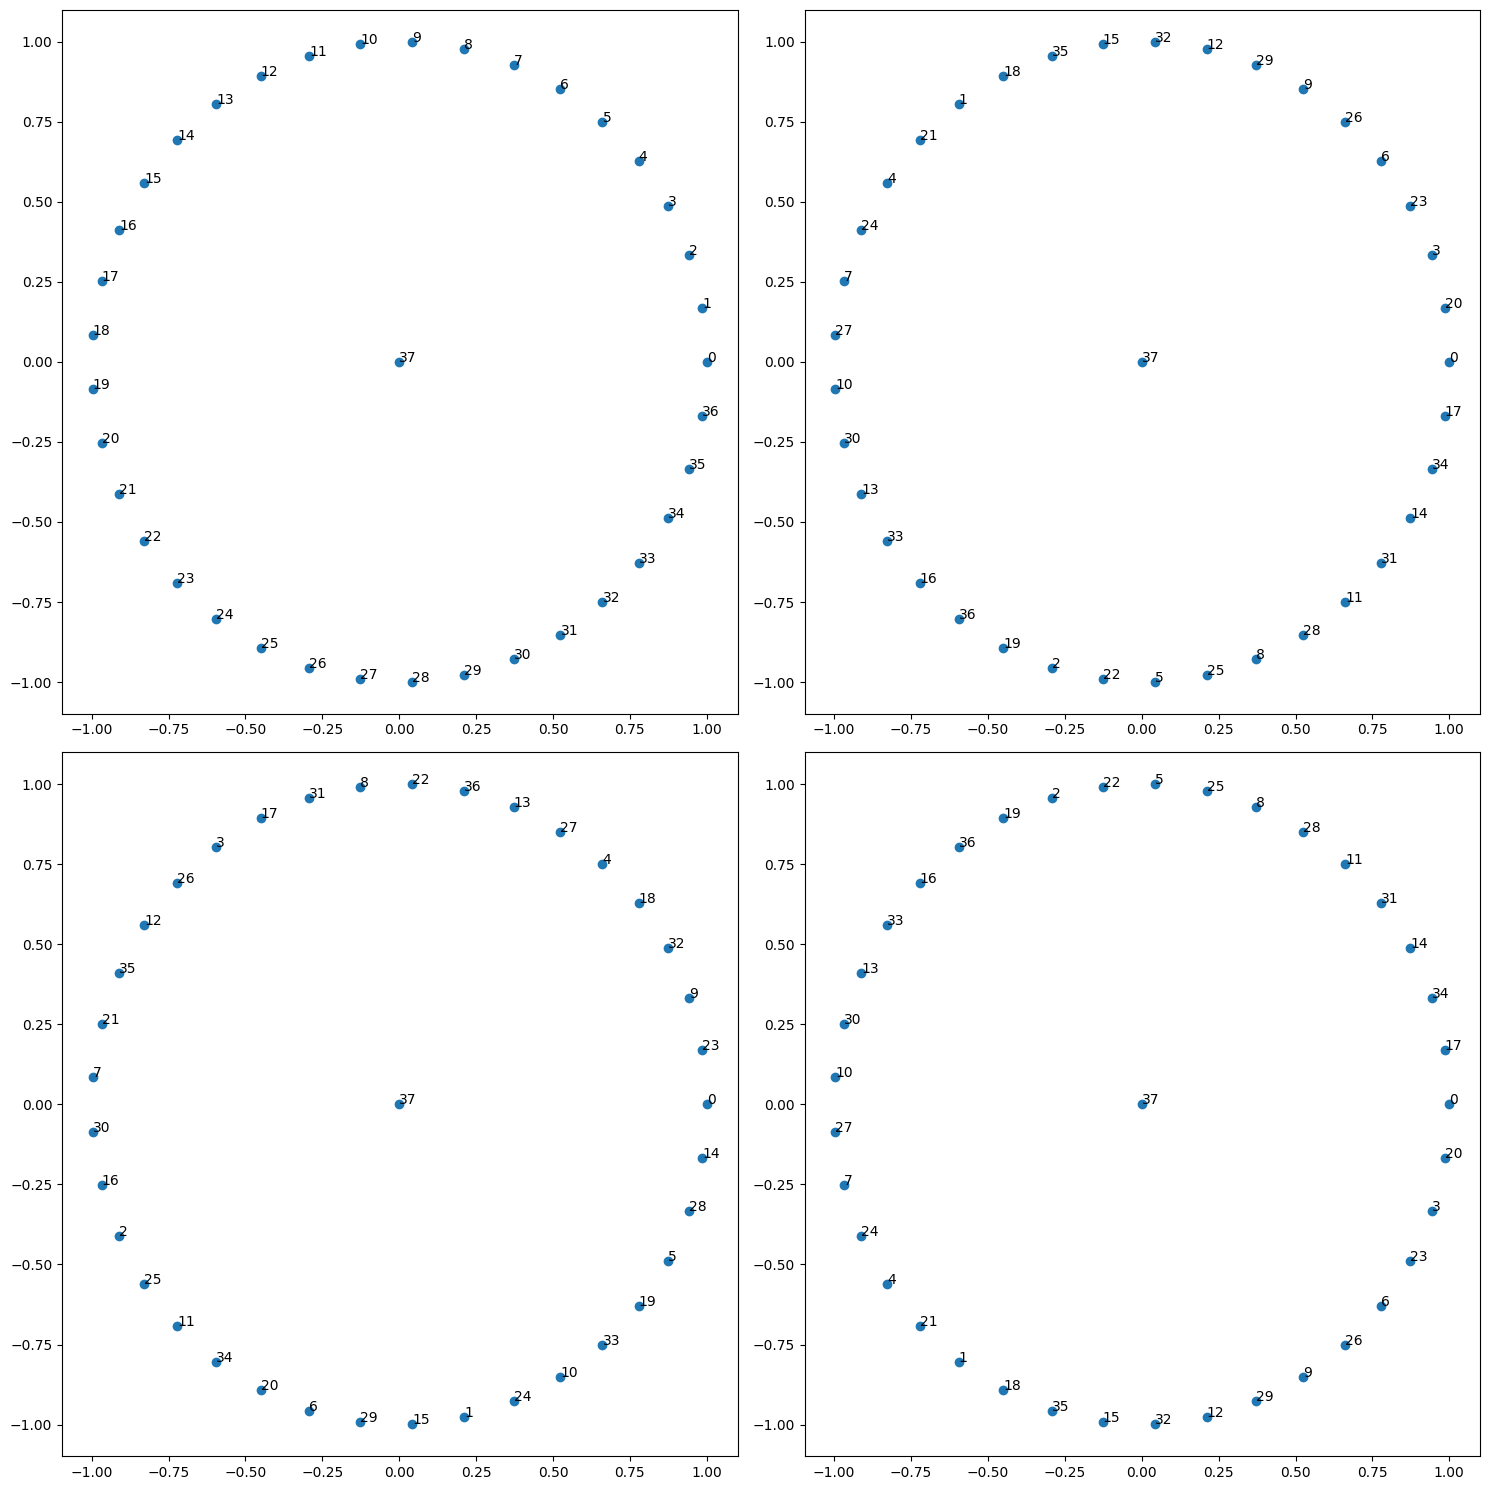

In [52]:
plot_embeddings_chunks(M_k)